In [1]:
import pandas as pd

df = pd.read_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_manipulated.csv')

In [2]:
df.select_dtypes(object).head()

,DepTimeBlk,Merged by Marketing_Airline_Network,Merged by Operating_Airline,Merged by OriginAirportID,Merged by DestAirportSeqID,Merged by DepDelay,Merged by CRSArrTime,Merged by ArrDelay,Merged by Distance,DelayLabel
0,1600-1659,DL / DL / 19790 / DL / N545US,DL / 19790 / DL,"10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...",1169706 / 11697 / 32467 / FLL / Fort Lauderdal...,-4.0 / 0.0 / 0.0 / -1.0,1821 / 1800-1859,-1.0 / 0.0 / 0.0 / -1.0,581.0 / 3,Almost on time
1,1000-1059,DL / DL / 19790 / DL / N345NB,DL / 19790 / DL,11697 / 1169706 / 32467 / FLL / Fort Lauderdal...,1449202 / 14492 / 34492 / RDU / Raleigh/Durham...,-5.0 / 0.0 / 0.0 / -1.0,1227 / 1200-1259,-15.0 / 0.0 / 0.0 / -1.0,680.0 / 3,Almost on time
2,1100-1159,DL / DL / 19790 / DL / N978AT,DL / 19790 / DL,"10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...",1244807 / 12448 / 32448 / JAN / Jackson/Vicksb...,-4.0 / 0.0 / 0.0 / -1.0,1142 / 1100-1159,-11.0 / 0.0 / 0.0 / -1.0,341.0 / 2,Almost on time
3,1200-1259,DL / DL / 19790 / DL / N978AT,DL / 19790 / DL,12448 / 1244807 / 32448 / JAN / Jackson/Vicksb...,"1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...",-7.0 / 0.0 / 0.0 / -1.0,1458 / 1400-1459,-23.0 / 0.0 / 0.0 / -2.0,341.0 / 2,Early
4,0900-0959,DL / DL / 19790 / DL / N878DN,DL / 19790 / DL,"14524 / 1452401 / 34524 / RIC / Richmond, VA /...","1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...",-3.0 / 0.0 / 0.0 / -1.0,1050 / 1000-1059,-12.0 / 0.0 / 0.0 / -1.0,481.0 / 2,Almost on time


In [3]:
df.select_dtypes(object).nunique()

DepTimeBlk                               13
Merged by Marketing_Airline_Network    3996
Merged by Operating_Airline              14
Merged by OriginAirportID               318
Merged by DestAirportSeqID              317
Merged by DepDelay                      739
Merged by CRSArrTime                    660
Merged by ArrDelay                      786
Merged by Distance                     1296
DelayLabel                                3
dtype: int64

Veri setinde one-hot encoding yapılması durumunda curse of dimensionality (boyut laneti) ile karşılaşılması olasıdır. Bunun önüne geçebilmek adına bir çözüm geliştirilmelidir.


Öncelikle sadece sayısal verileri üzerinden kümeleme yapalım.

In [4]:
numeric_atts = df.select_dtypes(include=[float, int])
numeric_atts = numeric_atts.iloc[:,:-4]
numeric_atts.head()

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings
0,1582,1631,1627.0,15.0,5.0,1820.0,0.0,0.0,110.0,113.0,93.0,1.0,0
1,1583,1024,1019.0,17.0,3.0,1212.0,0.0,0.0,123.0,113.0,93.0,1.0,0
2,1584,1117,1113.0,14.0,4.0,1131.0,0.0,0.0,85.0,78.0,60.0,1.0,0
3,1584,1237,1230.0,11.0,5.0,1435.0,0.0,0.0,81.0,65.0,49.0,1.0,0
4,1585,900,857.0,13.0,8.0,1038.0,0.0,0.0,110.0,101.0,80.0,1.0,0


In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
columns_ = numeric_atts.columns
numeric_atts_scaled = scaler.fit_transform(numeric_atts) #etiketli veriler çıkartıldı

In [6]:
numeric_atts_df_scaled = pd.DataFrame(numeric_atts_scaled, columns = numeric_atts.columns)

In [7]:
numeric_atts_df_scaled

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings
0,-0.817258,1.278581,1.190874,-0.241404,-0.416642,1.185754,0.0,0.0,-0.417425,-0.250867,-0.167621,0.0,-0.001852
1,-0.816695,-0.567731,-0.602018,-0.046715,-0.702176,-0.682987,0.0,0.0,-0.209648,-0.250867,-0.167621,0.0,-0.001852
2,-0.816133,-0.284853,-0.324827,-0.338748,-0.559409,-0.931948,0.0,0.0,-0.816996,-0.815845,-0.712981,0.0,-0.001852
3,-0.816133,0.080151,0.020187,-0.630781,-0.416642,0.002423,0.0,0.0,-0.880928,-1.025694,-0.894768,0.0,-0.001852
4,-0.815570,-0.944901,-1.079729,-0.436092,0.011658,-1.217791,0.0,0.0,-0.417425,-0.444574,-0.382460,0.0,-0.001852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291527,1.666006,1.248164,-0.032892,1.413449,5.151264,0.211427,0.0,0.0,0.237872,0.685382,-0.134569,0.0,-0.001852
291528,1.666006,1.248164,1.184977,-0.728125,1.153793,1.213416,0.0,0.0,0.237872,-0.073303,-0.084990,0.0,-0.001852
291529,1.666006,1.248164,1.529990,-0.436092,3.295295,1.751294,0.0,0.0,0.237872,0.217257,-0.084990,0.0,-0.001852
291530,1.666568,1.610126,1.518195,0.634695,-0.702176,1.468524,0.0,0.0,-0.657168,-0.557569,-0.597298,0.0,-0.001852


In [8]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))

c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anıl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

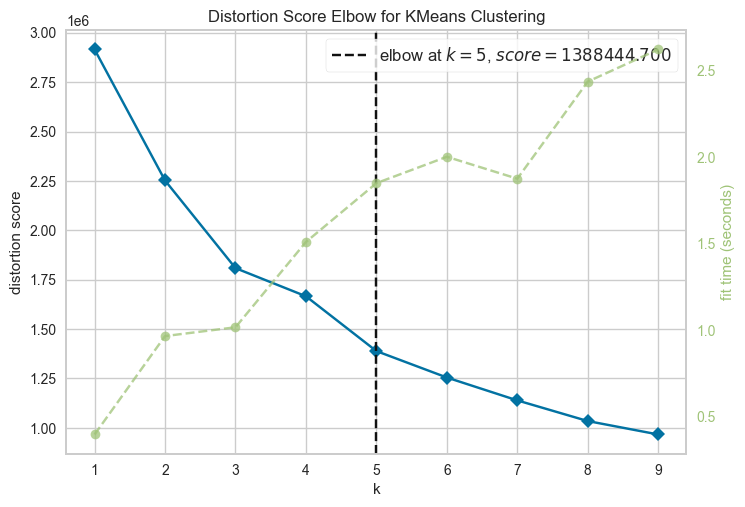

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
visualizer.fit(numeric_atts_scaled)
visualizer.poof()

Bir şey ifade etmiyor 

One-Hot Encoding yapalım ve tüm veriler ile kümeleme yapmayı deneylim.

In [10]:
df_ohe = pd.get_dummies(df.select_dtypes(include=[object]).iloc[:, :-1], prefix='Encoded')

In [11]:
df_ohe

,Encoded_0600-0659,Encoded_0700-0759,Encoded_0800-0859,Encoded_0900-0959,Encoded_1000-1059,Encoded_1100-1159,Encoded_1200-1259,Encoded_1300-1359,Encoded_1400-1459,Encoded_1500-1559,...,Encoded_99.0 / 1,Encoded_990.0 / 4,Encoded_991.0 / 4,Encoded_992.0 / 4,Encoded_993.0 / 4,Encoded_994.0 / 4,Encoded_996.0 / 4,Encoded_997.0 / 4,Encoded_998.0 / 4,Encoded_999.0 / 4
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
291528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
291529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
291530,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df_ohe.dtypes

Encoded_0600-0659    bool
Encoded_0700-0759    bool
Encoded_0800-0859    bool
Encoded_0900-0959    bool
Encoded_1000-1059    bool
                     ... 
Encoded_994.0 / 4    bool
Encoded_996.0 / 4    bool
Encoded_997.0 / 4    bool
Encoded_998.0 / 4    bool
Encoded_999.0 / 4    bool
Length: 8139, dtype: object

In [13]:
df_ohe.shape

(291532, 8139)

Veri fazla büyük, fazla sınıfa sahip kategorik değişkenleri çıkaralım.

In [14]:
df.select_dtypes(object).nunique()

DepTimeBlk                               13
Merged by Marketing_Airline_Network    3996
Merged by Operating_Airline              14
Merged by OriginAirportID               318
Merged by DestAirportSeqID              317
Merged by DepDelay                      739
Merged by CRSArrTime                    660
Merged by ArrDelay                      786
Merged by Distance                     1296
DelayLabel                                3
dtype: int64

Merged by Marketing_Airline_Network özniteliği veriyi oldukça büyütüyor. Onu ayıklayalım.

In [15]:
df_objects_ = df.select_dtypes(include=[object]).iloc[:, [0]+list(range(2,df.select_dtypes(object).shape[1]-1))]

In [21]:
df_ohe = pd.get_dummies(df_objects_, prefix='Encoded')

memory_usage = df_ohe.memory_usage(deep=True)

# Toplam bellek kullanımını MB cinsinden görüntüle
total_memory_mb = memory_usage.sum() / (1024 ** 2)
print(f"\nToplam Bellek Kullanımı: {total_memory_mb:.2f} MB")

# Toplam bellek kullanımını GB cinsinden görüntüle
total_memory_gb = memory_usage.sum() / (1024 ** 3)
print(f"Toplam Bellek Kullanımı: {total_memory_gb:.4f} GB")


Toplam Bellek Kullanımı: 1151.86 MB
Toplam Bellek Kullanımı: 1.1249 GB


In [17]:
df_ohe_ = df_ohe.astype(int)

memory_usage = df_ohe_.memory_usage(deep=True)

# Toplam bellek kullanımını MB cinsinden görüntüle
total_memory_mb = memory_usage.sum() / (1024 ** 2)
print(f"\nToplam Bellek Kullanımı: {total_memory_mb:.2f} MB")

# Toplam bellek kullanımını GB cinsinden görüntüle
total_memory_gb = memory_usage.sum() / (1024 ** 3)
print(f"Toplam Bellek Kullanımı: {total_memory_gb:.4f} GB")


Toplam Bellek Kullanımı: 4607.46 MB
Toplam Bellek Kullanımı: 4.4995 GB


In [20]:
del df_ohe_ #RAM'de yer kaplamamlı

In [22]:
array_encoded_scaled = np.concatenate([df_ohe.values, numeric_atts_scaled], axis = 1)

In [ ]:
array_encoded_scaled.shape

(291532, 4156)

In [ ]:
array_encoded_scaled.shape[0]/2

145766.0

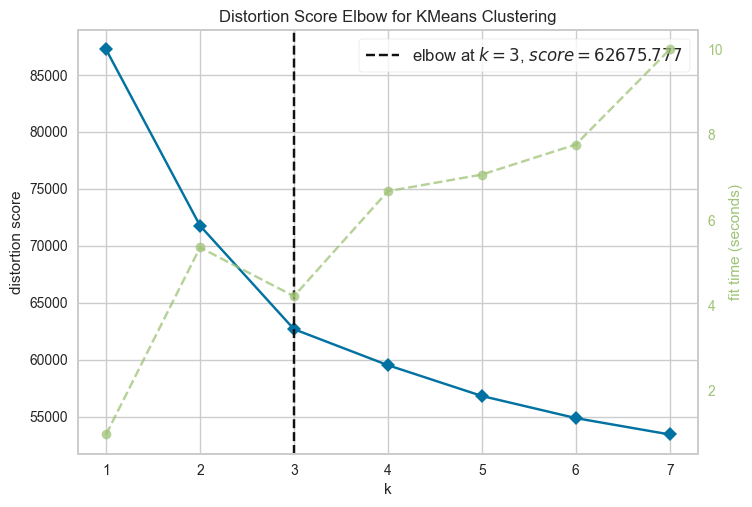

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,8))

#ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)

visualizer.fit(array_encoded_scaled[:int(array_encoded_scaled.shape[0]/50), :])
visualizer.poof()

Etiketli verilerimizi üç grupta sınıflandırmıştık. K-means ile de öyle görünmektedir ki, gözetimsiz olarak da veri seti üç sınıfta kümelenebilmektedir. (En optimal k değeri 3 görünmektedir.) Peki gözetimsiz olarak ayrışan bu 3 grup, etiketli sınıflandırma verilerimiz ile ne kadar tutarlı?

In [ ]:
# KMeans modeli oluştur
simple_array_encoded_scaled = array_encoded_scaled[:int(array_encoded_scaled.shape[0]/50), :]

kmeans = KMeans(n_clusters=3)
kmeans.fit(simple_array_encoded_scaled)

# Her bir gözlemin hangi kümeleme kümesine ait olduğunu görüntüle
unsupervised_labels = kmeans.labels_

In [ ]:
unsupervised_labels[:10]

array([2, 1, 1, 2, 1, 0, 2, 2, 1, 2])

In [ ]:
supervised_labels = df.DelayLabel

In [ ]:
pd.Series(supervised_labels)

0         Almost on time
1         Almost on time
2         Almost on time
3                  Early
4         Almost on time
               ...      
291527             Delay
291528    Almost on time
291529             Delay
291530    Almost on time
291531             Delay
Name: DelayLabel, Length: 291532, dtype: object

In [ ]:
supervised_labels.shape

(291532,)

In [ ]:
len_labels = int(supervised_labels.shape[0]/50)

In [ ]:
supervised_labels.iloc[:len_labels].shape

(5830,)

In [ ]:
unsupervised_labels = pd.Series(unsupervised_labels)

In [ ]:
df_comparation = pd.concat([supervised_labels.iloc[:len_labels], unsupervised_labels], axis=1)

In [ ]:
df_comparation

,DelayLabel,0
0,Almost on time,2
1,Almost on time,1
2,Almost on time,1
3,Early,2
4,Almost on time,1
...,...,...
5825,Almost on time,1
5826,Almost on time,0
5827,Almost on time,2
5828,Almost on time,1


In [ ]:
df_comparation.value_counts()

DelayLabel      0
Almost on time  2    1319
                1    1242
                0     758
Delay           2     722
                1     465
Early           1     449
Delay           0     356
Early           2     353
                0     166
Name: count, dtype: int64

Gözetimsiz etiketler ile gözetimli sınıflarımız çok da örtüşüyor gibi görünmüyor.

In [ ]:
numeric_atts_df_scaled

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings
0,-0.817258,1.278581,1.190874,-0.241404,-0.416642,1.185754,0.0,0.0,-0.417425,-0.250867,-0.167621,0.0,-0.001852
1,-0.816695,-0.567731,-0.602018,-0.046715,-0.702176,-0.682987,0.0,0.0,-0.209648,-0.250867,-0.167621,0.0,-0.001852
2,-0.816133,-0.284853,-0.324827,-0.338748,-0.559409,-0.931948,0.0,0.0,-0.816996,-0.815845,-0.712981,0.0,-0.001852
3,-0.816133,0.080151,0.020187,-0.630781,-0.416642,0.002423,0.0,0.0,-0.880928,-1.025694,-0.894768,0.0,-0.001852
4,-0.815570,-0.944901,-1.079729,-0.436092,0.011658,-1.217791,0.0,0.0,-0.417425,-0.444574,-0.382460,0.0,-0.001852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291527,1.666006,1.248164,-0.032892,1.413449,5.151264,0.211427,0.0,0.0,0.237872,0.685382,-0.134569,0.0,-0.001852
291528,1.666006,1.248164,1.184977,-0.728125,1.153793,1.213416,0.0,0.0,0.237872,-0.073303,-0.084990,0.0,-0.001852
291529,1.666006,1.248164,1.529990,-0.436092,3.295295,1.751294,0.0,0.0,0.237872,0.217257,-0.084990,0.0,-0.001852
291530,1.666568,1.610126,1.518195,0.634695,-0.702176,1.468524,0.0,0.0,-0.657168,-0.557569,-0.597298,0.0,-0.001852


In [23]:
numeric_atts.to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_numeric_atts.csv', index=False)

In [24]:
numeric_atts_df_scaled.to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_numeric_atts_scaled.csv', index=False)

In [25]:

df_objects_.to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_objects.csv', index=False)

In [26]:
df.iloc[:, [-1, -5]].to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_targets.csv', index=False)

In [27]:
df_ohe.to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_objects_encoded.csv', index=False)